<a href="https://colab.research.google.com/github/Zircornn-Black/DSF_Group-6/blob/main/Project_Ph4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding

Objectives:
1.	Understand Household Electricity Consumption Patterns: The primary objective of this project is to gain insights into the household's electricity consumption patterns over time. This includes analyzing the trends, seasonality, and any other relevant patterns in the various electricity-related variables.
2.	Identify Factors Influencing Electricity Consumption: The project aims to identify the key factors that influence the household's electricity consumption, such as time of day, day of the week, seasons, and the usage of specific appliances (sub-metering data).
3.	Develop Predictive Models: Using the time series data, the project may involve developing predictive models to forecast future electricity consumption patterns. This could help the household better manage its energy usage and costs.
4.	Optimize Energy Efficiency: The insights gained from the analysis can be used to identify opportunities for improving energy efficiency within the household, such as identifying high-consumption appliances or periods of the day/week with peak demand.
Potential Business Applications:
1.	Household Energy Management: The analysis can help the household better understand its energy consumption patterns and make informed decisions to optimize energy usage and reduce costs.
2.	Utility Company Insights: The project's findings could provide valuable insights to utility companies about residential electricity consumption patterns, which could aid in grid management, demand forecasting, and the development of targeted energy efficiency programs.
3.	Energy Policy and Planning: The project's insights could contribute to the development of energy policies and planning initiatives that aim to promote energy efficiency and sustainability at the household and community levels.
4.	Research and Development: The dataset and analysis could be used for further research and development in the areas of smart home technologies, energy management systems, and the optimization of household energy consumption.
Overall, this time series project on household electricity consumption has the potential to provide valuable insights that can benefit the household, utility companies, policymakers, and researchers in the energy and sustainability domains.

# Data Understanding and Loading

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
#Importing libraries
import sys
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

In [11]:
#Data Loading
df = pd.read_csv('/content/household_power_consumption[1].txt', sep=';',
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True,
                 low_memory=False, na_values=['nan','?'], index_col='dt')

<ipython-input-11-2f40051c7c9e>:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('/content/household_power_consumption[1].txt', sep=';',
<ipython-input-11-2f40051c7c9e>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('/content/household_power_consumption[1].txt', sep=';',


In [12]:
# Ensure 'Datetime' column is present and convert to datetime
if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])
    dfset_index('Datetime', inplace=True)

In [13]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 262421 entries, 2006-12-16 17:24:00 to 2007-06-16 23:04:00
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    258649 non-null  float64
 1   Global_reactive_power  258649 non-null  float64
 2   Voltage                258648 non-null  float64
 3   Global_intensity       258648 non-null  float64
 4   Sub_metering_1         258648 non-null  float64
 5   Sub_metering_2         258648 non-null  float64
 6   Sub_metering_3         258648 non-null  float64
dtypes: float64(7)
memory usage: 16.0 MB


In [15]:
df.shape

(262421, 7)

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Global_active_power,258649.0,1.261976,1.230738,0.084,0.308,0.778,1.786,10.670
Global_reactive_power,258649.0,0.123037,0.112500,0.000,0.000,0.104,0.192,0.988
Voltage,258648.0,239.313788,3.758244,223.490,236.580,239.640,242.040,251.700
Global_intensity,258648.0,5.376023,5.202990,0.400,1.400,3.400,7.600,46.400
Sub_metering_1,258648.0,1.349216,6.754052,0.000,0.000,0.000,0.000,78.000
Sub_metering_2,258648.0,1.727858,6.888553,0.000,0.000,0.000,1.000,78.000
Sub_metering_3,258648.0,6.119920,8.286684,0.000,0.000,0.000,17.000,20.000


# Data Cleaning

In [17]:
#Checking for missing values
df.isnull().sum()

Global_active_power      3772
Global_reactive_power    3772
Voltage                  3773
Global_intensity         3773
Sub_metering_1           3773
Sub_metering_2           3773
Sub_metering_3           3773
dtype: int64

In [18]:
#Checking for duplicates
df.duplicated().sum()

16587

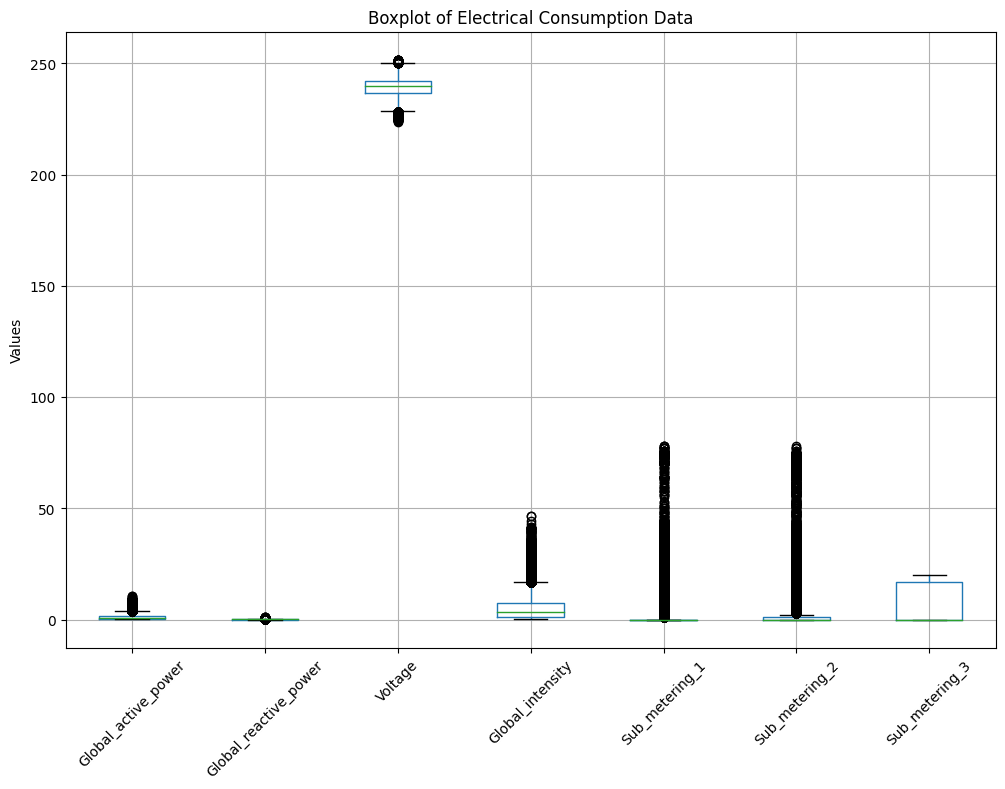

In [19]:
#Checking for outliers
plt.figure(figsize=(12, 8))
df.boxplot(column=['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'])
plt.title('Boxplot of Electrical Consumption Data')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

We have no outliers

# Data Visualiation and EDA

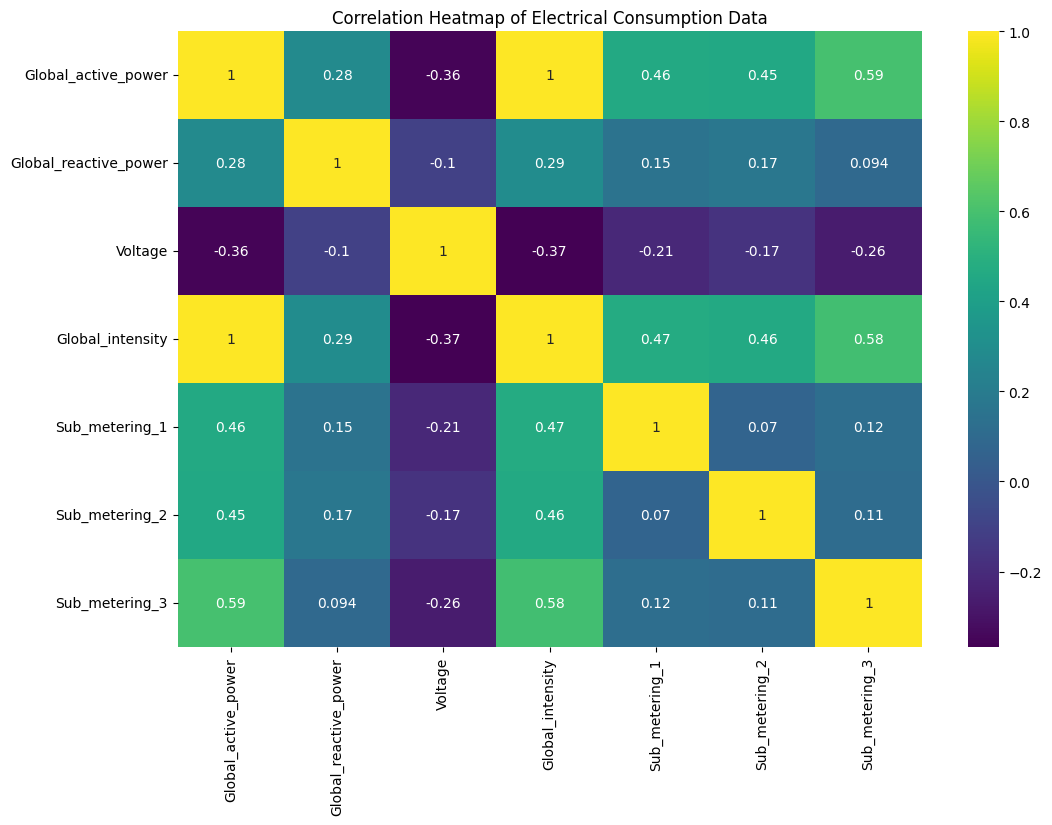

In [20]:
#Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap of Electrical Consumption Data')
plt.show()

In [21]:
#Highly correlated features summary
corr_matrix = df.corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.5)]

print(f"The following {len(to_drop)} features are highly correlated (|r| > 0.5):")
print(', '.join(to_drop))

The following 2 features are highly correlated (|r| > 0.5):
Global_intensity, Sub_metering_3


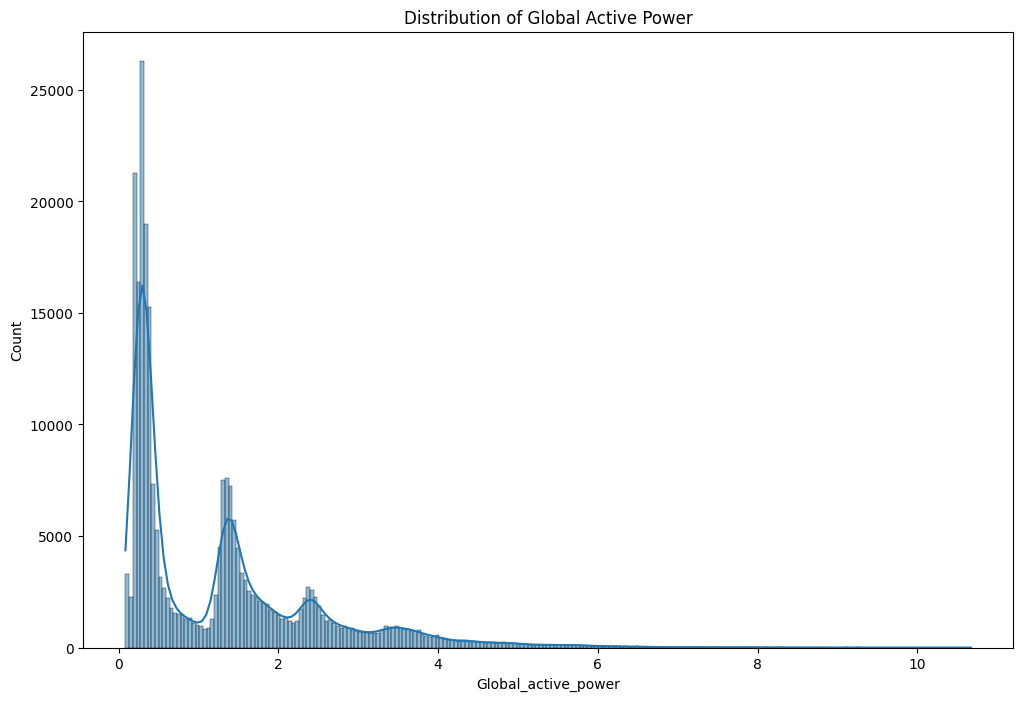

In [22]:
#Univariate analysis on Global active power
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Global_active_power', kde=True)
plt.title('Distribution of Global Active Power')
plt.show()

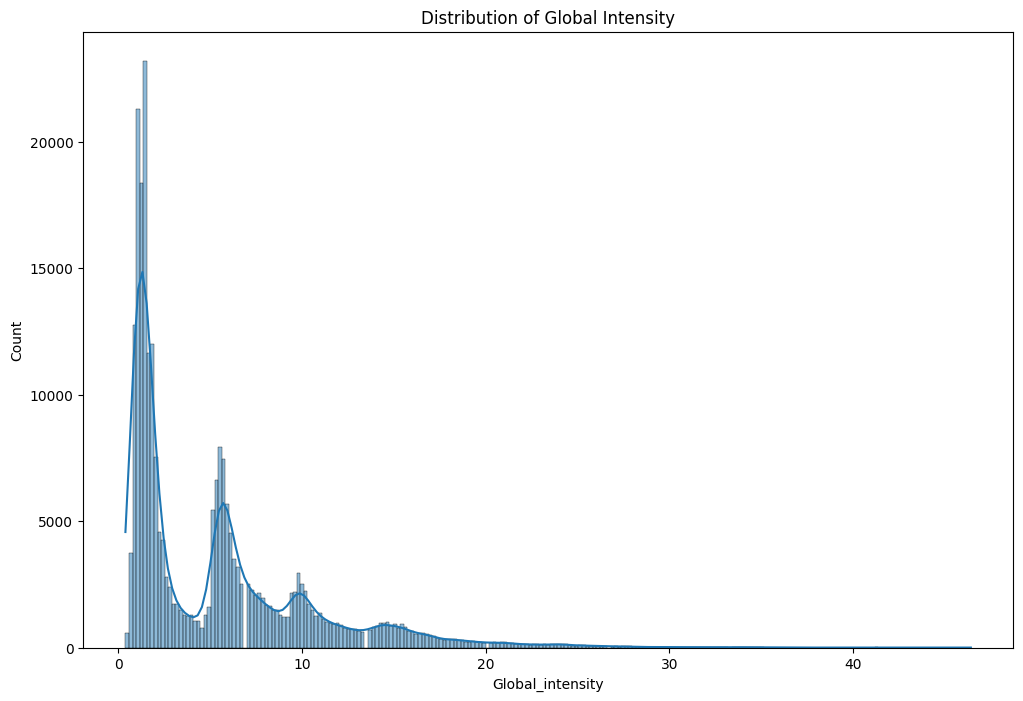

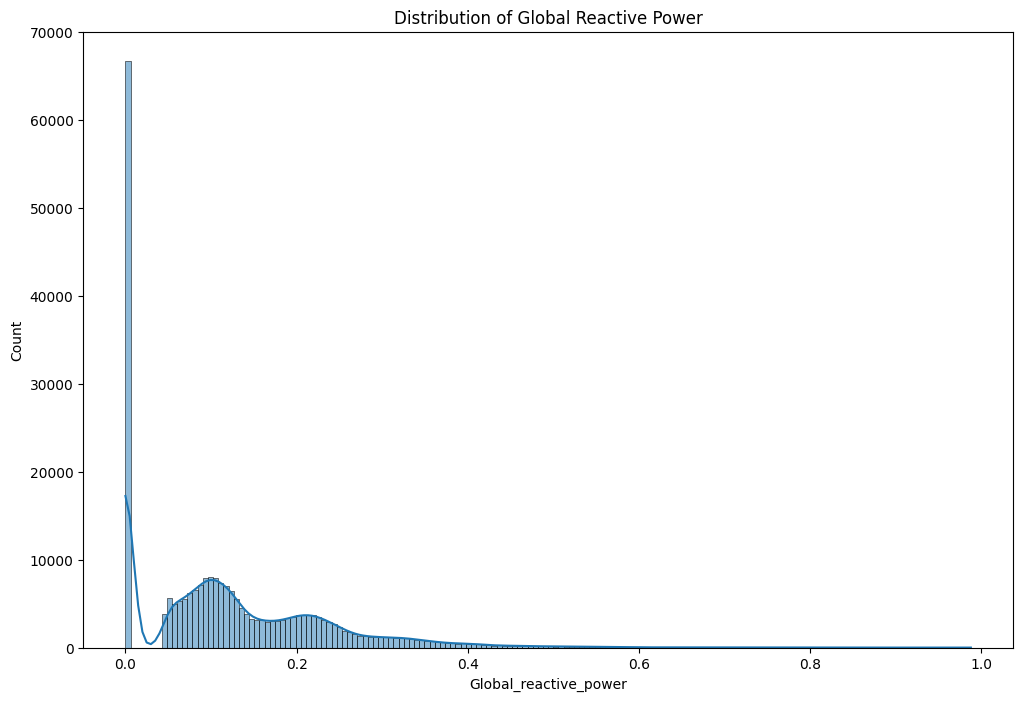

In [23]:
##Univariate analysis on Global reactive power and Global intensity
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Global_intensity', kde=True)
plt.title('Distribution of Global Intensity')
plt.show()
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Global_reactive_power', kde=True)
plt.title('Distribution of Global Reactive Power')
plt.show()

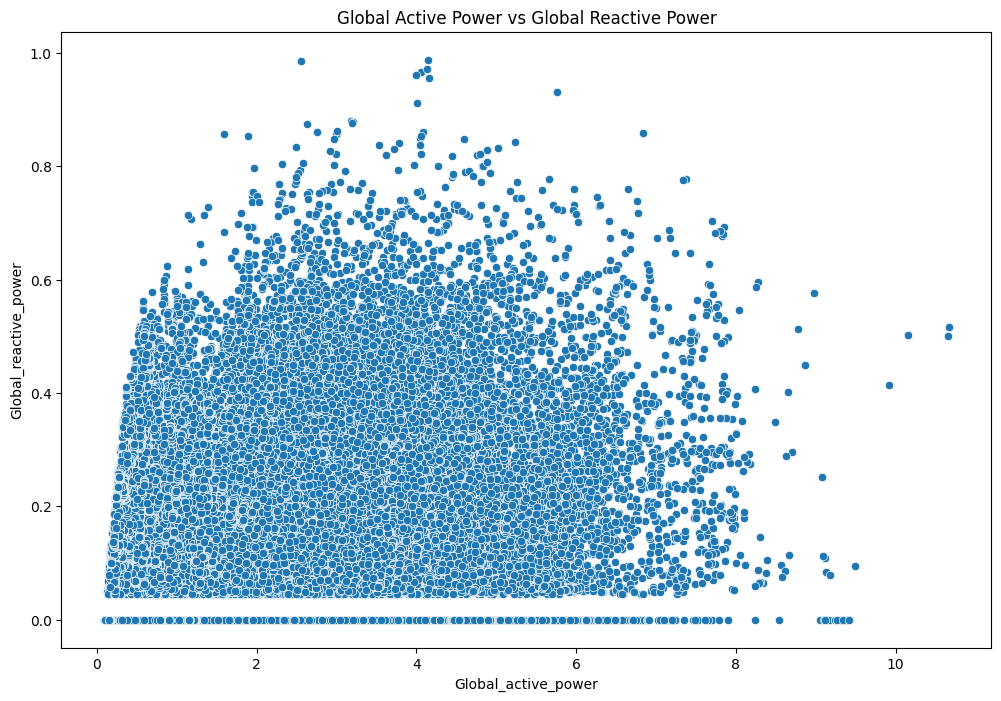

In [24]:
#plotting global active power vs global reactive power
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Global_active_power', y='Global_reactive_power')
plt.title('Global Active Power vs Global Reactive Power')
plt.show()

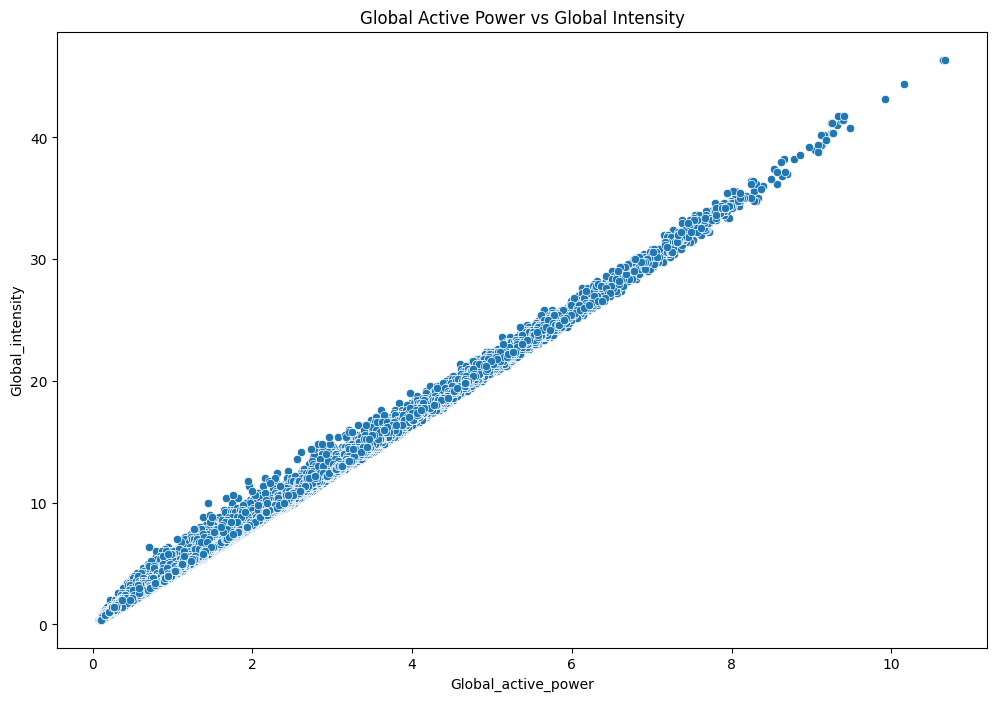

In [25]:
#plotting global active power vs global intensity
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Global_active_power', y='Global_intensity')
plt.title('Global Active Power vs Global Intensity')
plt.show()

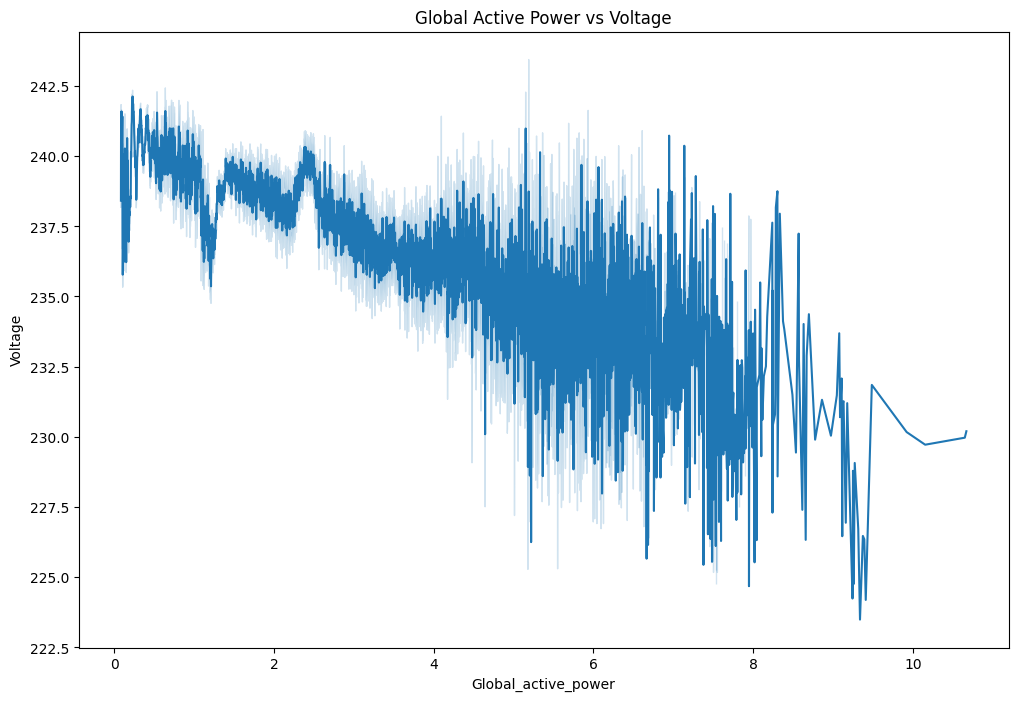

In [26]:
#plotting global active power and voltage line plot
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x='Global_active_power', y='Voltage')
plt.title('Global Active Power vs Voltage')
plt.show()


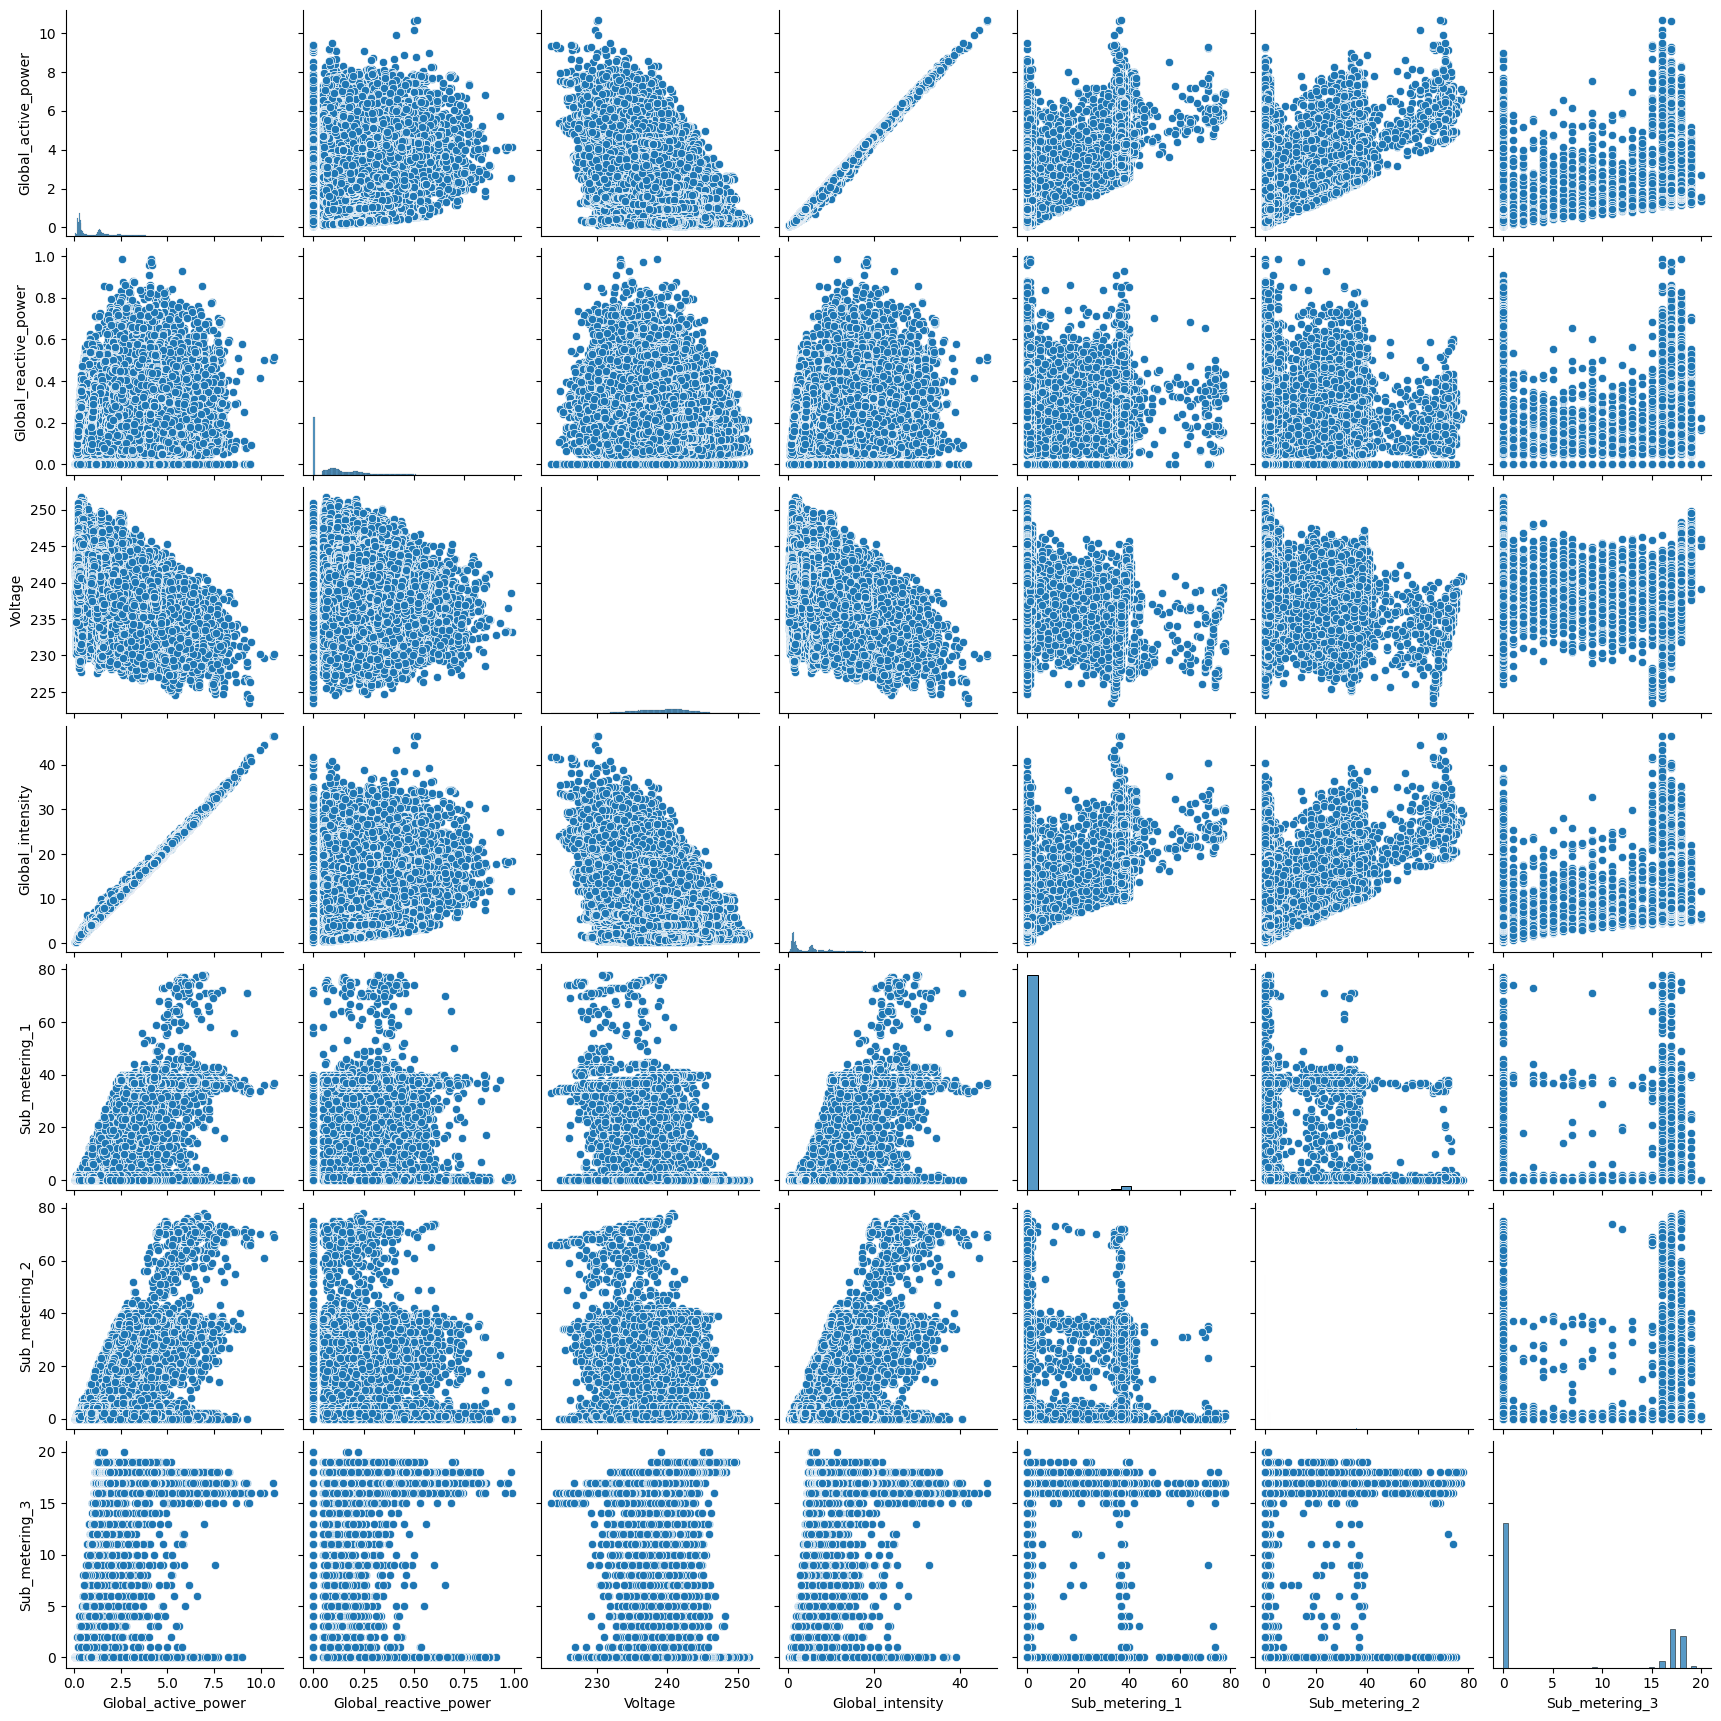

In [27]:
#multivariate analysis for all features
sns.pairplot(df)
plt.show()

In [28]:
#Checking the distribution of out data
df.skew()

Global_active_power      1.552661
Global_reactive_power    1.148742
Voltage                 -0.210127
Global_intensity         1.607004
Sub_metering_1           5.320106
Sub_metering_2           5.680666
Sub_metering_3           0.624180
dtype: float64

<ipython-input-29-a771818689ed>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Global_active_power'])


<Axes: xlabel='Global_active_power', ylabel='Density'>

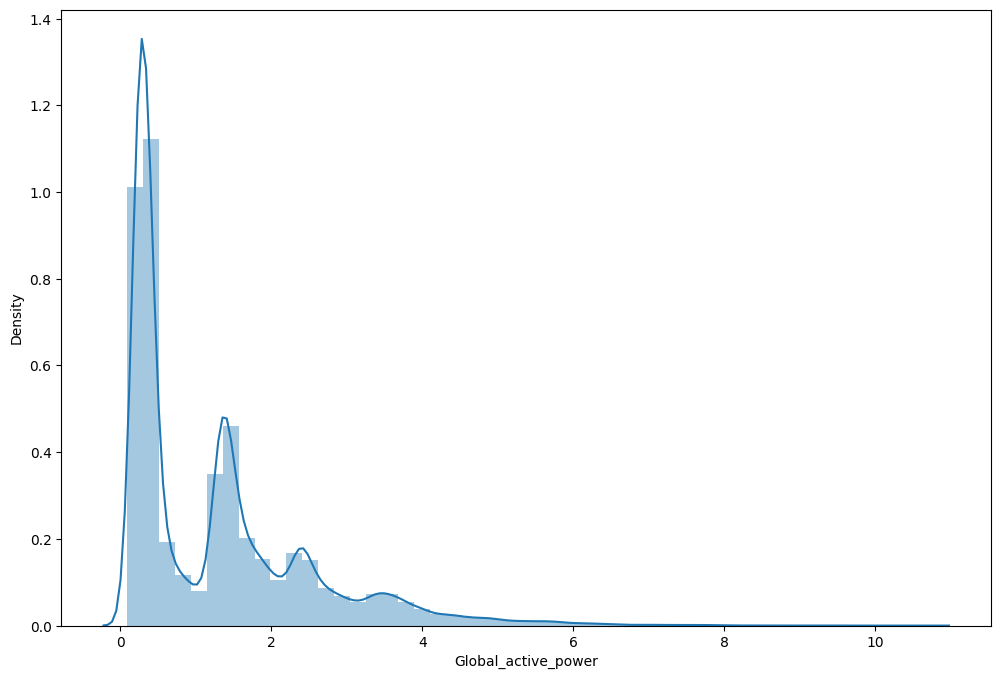

In [29]:
#Checking if our data is normally distributed
plt.figure(figsize=(12, 8))
sns.distplot(df['Global_active_power'])

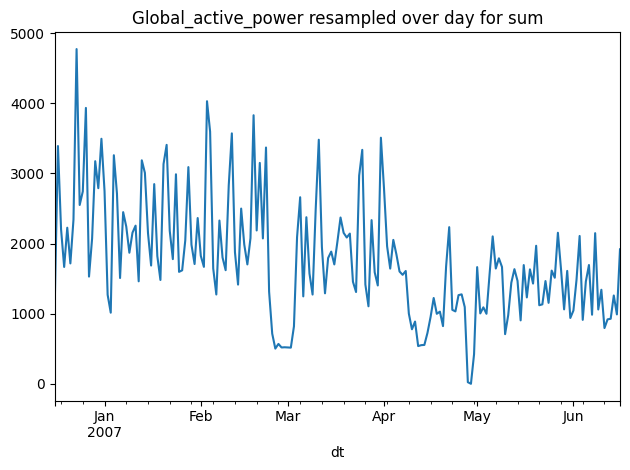

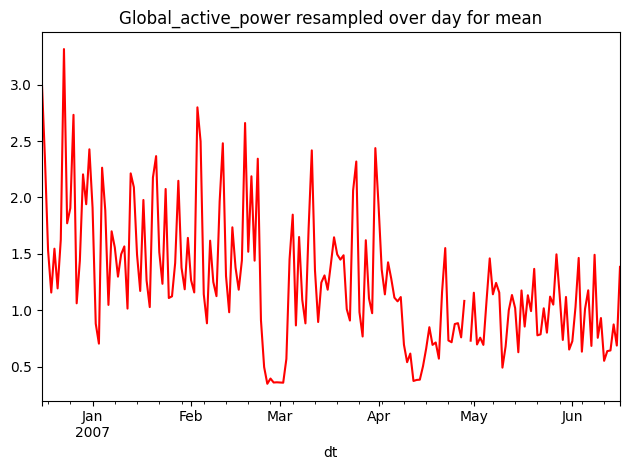

In [30]:
#Resampling the data over Day
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum')
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red')
plt.tight_layout()
plt.show()

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red')
plt.tight_layout()
plt.show()

The sum plot helps identify total daily consumption patterns.
The mean plot helps identify average daily usage, smoothing out multiple entries per day
Sum Plot:High consumption on February 23rd and lower on 27th .
Mean plot :Highest mean on February 23rd, showing a day with consistently high usage.

Below I show mean and std of 'Global_intensity' resampled over day

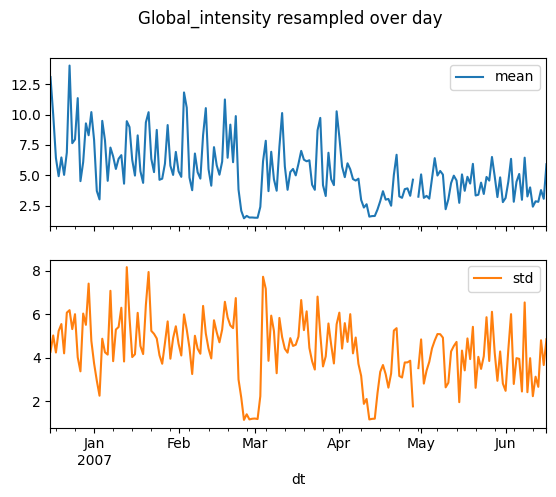

In [31]:
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

showing mean and std of 'Global_reactive_power' resampled over day

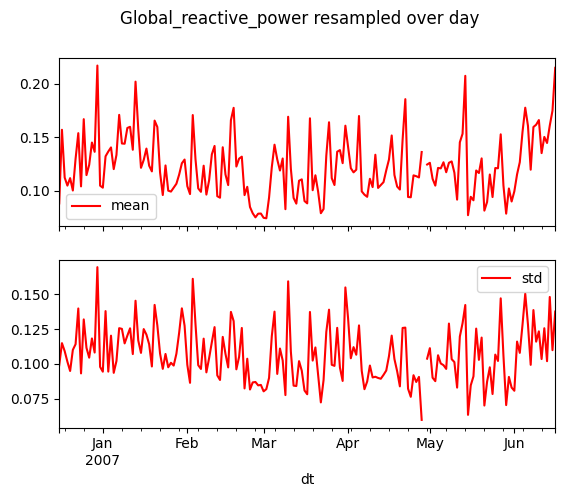

In [32]:
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

Sum of 'Global_active_power' resampled over month

Columns in DataFrame: Index(['Global_active_power', 'Datetime'], dtype='object')
Monthly Sum of Global_active_power:
Datetime
2023-01-31    3.6
2023-02-28    7.3
2023-03-31    2.3
Freq: M, Name: Global_active_power, dtype: float64


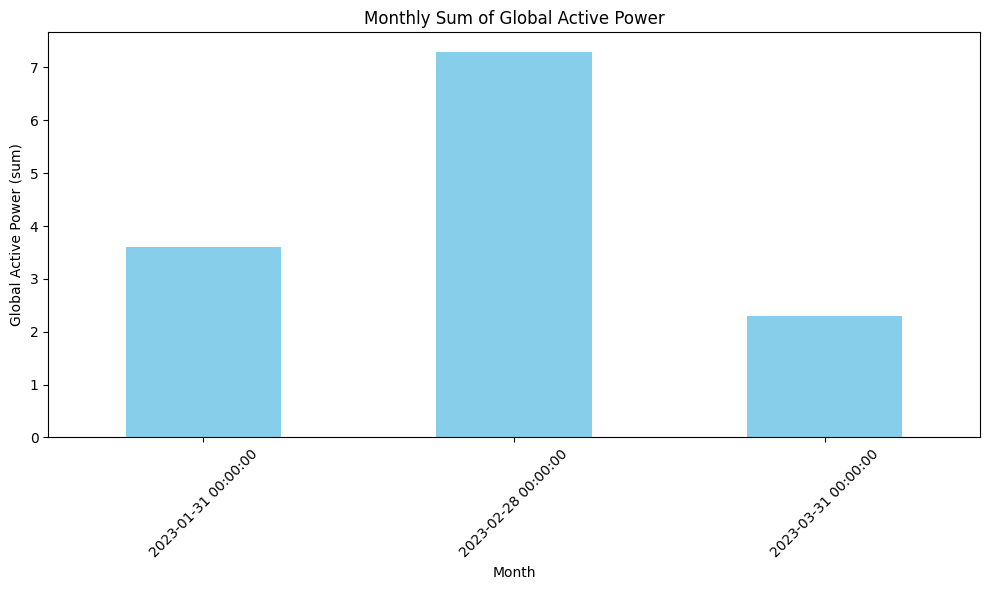

In [33]:
# Sample data creation
data = pd.DataFrame({
    'Global_active_power': [1.2, 2.4, 3.1, 4.2, 2.3],
    'Datetime': ['2023-01-01', '2023-01-02', '2023-02-01', '2023-02-02', '2023-03-01']
})

# Print the columns to verify
print("Columns in DataFrame:", data.columns)

# Ensure 'Datetime' column is present and convert to datetime
if 'Datetime' in data.columns:
    data['Datetime'] = pd.to_datetime(data['Datetime'])
    data.set_index('Datetime', inplace=True)

    # Resample the data by month and calculate the sum of 'Global_active_power'
    monthly_sum = data['Global_active_power'].resample('M').sum()

    # Display the result
    print("Monthly Sum of Global_active_power:")
    print(monthly_sum)
     # Plot the result
    plt.figure(figsize=(10, 6))
    monthly_sum.plot(kind='bar', color='skyblue')
    plt.title('Monthly Sum of Global Active Power')
    plt.xlabel('Month')
    plt.ylabel('Global Active Power (sum)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("The column 'Datetime' does not exist in the DataFrame.")

February 2023 has the highest energy consumption (sum of 'Global_active_power'), possibly indicating higher activity or usage during that month.
March 2023 has the lowest energy consumption, which could suggest less activity or fewer data points.
January 2023 falls in between, showing moderate energy consumption.

In [34]:
#Scaling of Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)





In [35]:
#Perform the ADF test
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming 'df' is your DataFrame
# Replace 'df' with the actual variable name if it's different
# Check for infinite values and replace them with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill or drop missing values (choose one method)
# 1. Fill with mean:
df['Global_active_power'].fillna(df['Global_active_power'].mean(), inplace=True)
# Perform the ADF test
result = adfuller(df['Global_active_power'])

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -25.145043
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


Given that the ADF statistic (-25.145043) is much lower than the critical values at all significance levels (1%, 5%, 10%), and the p-value is 0.000000, you can reject the null hypothesis with high confidence.

In [38]:
#Spliting and training the dataset
X = df.drop('Global_active_power', axis=1)
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
#Long short term memory
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [40]:
#reshaping input for LSTM


**bold text**